## Fase 2: Análisis Estadístico

### Análisis de variables numéricas:

Estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) de las variables numéricas relevantes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 

In [ ]:
df_final = pd.read_csv("../data/df_final.csv")

In [4]:
num_cols = ["flights_booked", "flights_with_companions", "total_flights", "distance", "points_accumulated", "points_redeemed", "dollar_cost_points_redeemed", "salary", "clv"]

In [5]:
def resumen_numerico(df, columnas):
    
    resumen = []
    
    for col in columnas:
        
        if col not in df.columns:
            continue
        
        serie = df[col]
        
        media = serie.mean()
        mediana = serie.median()
        moda = serie.mode()[0]
        p25 = serie.quantile(0.25)
        p75 = serie.quantile(0.75)
        std = serie.std()
        cv = std / media if media != 0 else np.nan
        rango = serie.max() - serie.min()
        
        resumen.append([col, media, mediana, moda, p25, p75, std, cv, rango])
    
    columnas_resumen = ["Variable", "Media", "Mediana", "Moda", "P25", "P75", "Desviación estándar", "Coeficiente de variación", "Rango"]
    
    df_resumen = pd.DataFrame(resumen, columns=columnas_resumen)
    
    return df_resumen.round(2)

In [6]:
resumen_numerico(df_final, num_cols)

,Variable,Media,Mediana,Moda,P25,P75,Desviación estándar,Coeficiente de variación,Rango
0,flights_booked,4.13,1.00,0.00,0.00,8.00,5.23,1.27,21.00
1,flights_with_companions,1.04,0.00,0.00,0.00,1.00,2.08,2.01,11.00
2,total_flights,5.17,1.00,0.00,0.00,10.00,6.53,1.26,32.00
3,distance,1214.46,525.00,0.00,0.00,2342.00,1434.10,1.18,6293.00
4,points_accumulated,124.26,53.00,0.00,0.00,240.00,146.70,1.18,676.50
5,points_redeemed,30.84,0.00,0.00,0.00,0.00,125.76,4.08,876.00
6,dollar_cost_points_redeemed,2.50,0.00,0.00,0.00,0.00,10.17,4.08,71.00
7,salary,77922.17,73479.00,73479.00,64001.00,82940.00,30078.20,0.39,391619.00
8,clv,7990.86,5776.34,8564.77,3981.78,8937.12,6863.32,0.86,81427.37


## Análisis de variables numéricas

El análisis descriptivo muestra que la mayoría de las variables relacionadas con la actividad de vuelo presentan una distribución claramente asimétrica.

### Actividad de vuelos

En *flights_booked* y *total_flights* se observa que la mediana (1) es considerablemente menor que la media (aproximadamente entre 4 y 5). Además, el percentil 25 y la moda son 0, y el coeficiente de variación es superior a 1.

Esto indica que la mayoría de los clientes reserva pocos vuelos, mientras que un grupo reducido presenta valores elevados que incrementan la media. Existe, por tanto, una alta dispersión en el comportamiento.

### Vuelos con acompañantes

En *flights_with_companions* la mediana es 0 y el coeficiente de variación es 2.01, lo que evidencia una variabilidad relativa muy elevada. La mayoría de los clientes no viaja con acompañantes, aunque algunos casos con valores altos generan dispersión.

### Distancia y puntos acumulados

Las variables *distance* y *points_accumulated* presentan una media claramente superior a la mediana, un percentil 25 igual a 0 y un coeficiente de variación mayor que 1.

Esto confirma una concentración de clientes con baja actividad y una minoría con niveles de actividad elevados.

### Redención de puntos

Las variables *points_redeemed* y *dollar_cost_points_redeemed* muestran un comportamiento muy concentrado:

- Mediana igual a 0  
- Percentil 75 igual a 0  
- IQR igual a 0  
- Coeficiente de variación cercano a 4  

Esto indica que más del 75% de los clientes no redime puntos, mientras que una minoría concentra los valores altos.

### Salary

El salario presenta un comportamiento diferente al resto de variables:

- Media y mediana cercanas  
- Coeficiente de variación bajo (0.39)  
- Distribución más estable  

Esto sugiere menor dispersión relativa en comparación con las variables relacionadas con la actividad de vuelo.

### CLV

El *clv* presenta una media superior a la mediana, un coeficiente de variación de 0.86 y un rango amplio. Esto indica la existencia de clientes con un valor significativamente alto dentro del programa.

## Conclusión general

El comportamiento de los clientes es heterogéneo, especialmente en las variables relacionadas con vuelos y redención de puntos, donde predominan valores bajos y existen algunos casos extremos que elevan la media. En cambio, el salario muestra una distribución más equilibrada y estable.


Identificación de valores atípicos en las variables numéricas.

In [7]:
def detectar_outliers_iqr(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        
        print(f"\nVariable: {col}")
        print(f"Número de valores atípicos: {len(outliers)}")

In [8]:
detectar_outliers_iqr(df_final, num_cols)


Variable: flights_booked
Número de valores atípicos: 528

Variable: flights_with_companions
Número de valores atípicos: 71560

Variable: total_flights
Número de valores atípicos: 1984

Variable: distance
Número de valores atípicos: 125

Variable: points_accumulated
Número de valores atípicos: 112

Variable: points_redeemed
Número de valores atípicos: 24181

Variable: dollar_cost_points_redeemed
Número de valores atípicos: 24181

Variable: salary
Número de valores atípicos: 20684

Variable: clv
Número de valores atípicos: 35941


La detección de valores atípicos mediante el método del rango intercuartílico (IQR) evidencia la presencia de valores extremos en varias variables numéricas del dataset.

En las variables relacionadas con la actividad de vuelo, como flights_booked y total_flights, se identifican algunos valores superiores al límite establecido, lo que indica la existencia de clientes con una frecuencia de vuelo significativamente mayor que la mayoría. En flights_with_companions el número de valores detectados es más elevado, lo que se explica por la fuerte concentración de valores bajos, haciendo que cualquier valor relativamente superior sea considerado extremo según el criterio estadístico.

Las variables relacionadas con la redención de puntos (points_redeemed y dollar_cost_points_redeemed) también presentan un número considerable de valores atípicos, reflejando que un grupo reducido de clientes concentra una mayor utilización de beneficios del programa.

En el caso de salary y clv, se observan valores extremos en la parte superior de la distribución, lo que evidencia la existencia de clientes con ingresos y valor de vida significativamente superiores al promedio.

En conjunto, los resultados muestran una distribución caracterizada por la concentración de valores bajos y la presencia de valores elevados en varias variables clave, lo que confirma la heterogeneidad del comportamiento de los clientes.

Análisis de correlación entre variables numéricas.

In [ ]:
corr_matrix = df_final[num_cols].corr()
corr_matrix

,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary,clv
flights_booked,1.000000,0.501698,0.961233,0.766748,0.759547,0.187638,0.187647,0.004607,-0.002847
flights_with_companions,0.501698,1.000000,0.720773,0.517188,0.510284,0.334000,0.334060,0.001535,-0.002510
total_flights,0.961233,0.720773,1.000000,0.779262,0.771291,0.256821,0.256848,0.004181,-0.003081
distance,0.766748,0.517188,0.779262,1.000000,0.994546,0.223707,0.223728,0.006532,-0.004132
points_accumulated,0.759547,0.510284,0.771291,0.994546,1.000000,0.222674,0.222707,0.006427,-0.000942
points_redeemed,0.187638,0.334000,0.256821,0.223707,0.222674,1.000000,0.999972,0.001924,-0.000265
dollar_cost_points_redeemed,0.187647,0.334060,0.256848,0.223728,0.222707,0.999972,1.000000,0.001917,-0.000238
salary,0.004607,0.001535,0.004181,0.006532,0.006427,0.001924,0.001917,1.000000,-0.015840
clv,-0.002847,-0.002510,-0.003081,-0.004132,-0.000942,-0.000265,-0.000238,-0.015840,1.000000


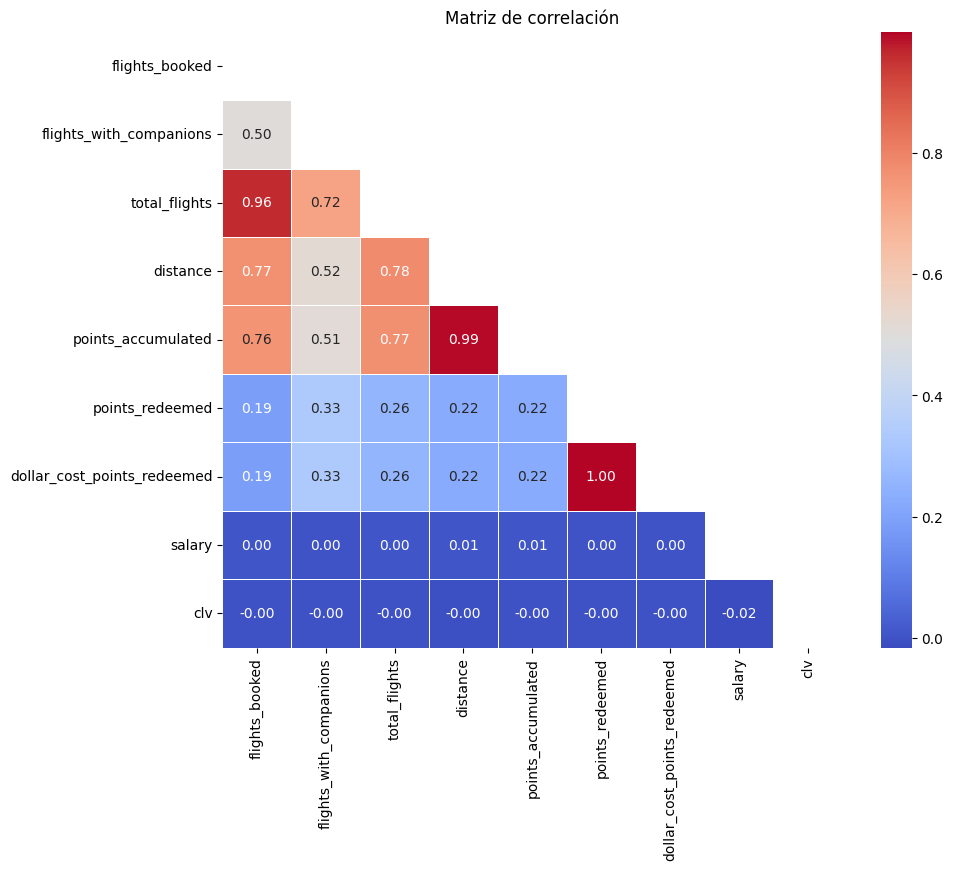

In [10]:
corr_matrix = df_final[num_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    mask=mask,
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Matriz de correlación")
plt.show()

La matriz de correlación muestra relaciones muy fuertes entre variables directamente relacionadas, como distance y points_accumulated (0.99), así como entre points_redeemed y dollar_cost_points_redeemed (1.00), lo cual es coherente con la estructura del programa de fidelización.

También se observa una alta correlación entre flights_booked y total_flights (0.96), indicando que ambas variables reflejan esencialmente el mismo comportamiento de vuelo.

Por otro lado, salary y clv presentan correlaciones prácticamente nulas con el resto de variables, lo que sugiere que el nivel de ingresos y el valor de vida del cliente no están directamente relacionados con la actividad mensual de vuelos.

## Análisis de variables categóricas:

Distribución de frecuencias de las variables categóricas relevantes

In [11]:
cat_cols = [
    "country",
    "province",
    "city",
    "gender",
    "education",
    "marital_status",
    "loyalty_card",
    "enrollment_type",
    "customer_status"
]

In [12]:
def tabla_frecuencias(df, columna):
    """
    Devuelve tabla con frecuencia absoluta y relativa (%)
    """
    
    frecuencia_abs = df[columna].value_counts()
    frecuencia_rel = df[columna].value_counts(normalize=True) * 100
    
    tabla = pd.DataFrame({"Frecuencia absoluta": frecuencia_abs, "Frecuencia relativa (%)": frecuencia_rel.round(2)})
    
    return tabla

In [ ]:
for col in cat_cols:
    print(f"{col.upper()}")
    display(tabla_frecuencias(df_final, col))

COUNTRY


,Frecuencia absoluta,Frecuencia relativa (%)
country,,
Canada,403760,100.0


PROVINCE


,Frecuencia absoluta,Frecuencia relativa (%)
province,,
Ontario,130258,32.26
British Columbia,106442,26.36
Quebec,79573,19.71
Alberta,23360,5.79
Manitoba,15900,3.94
New Brunswick,15352,3.80
Nova Scotia,12507,3.10
Saskatchewan,9861,2.44
Newfoundland,6244,1.55


CITY


,Frecuencia absoluta,Frecuencia relativa (%)
city,,
Toronto,80775,20.01
Vancouver,62314,15.43
Montreal,49687,12.31
Winnipeg,15900,3.94
Whistler,13994,3.47
Halifax,12507,3.10
Ottawa,12262,3.04
Edmonton,11768,2.91
Trenton,11710,2.90


GENDER


,Frecuencia absoluta,Frecuencia relativa (%)
gender,,
Female,202757,50.22
Male,201003,49.78


EDUCATION


,Frecuencia absoluta,Frecuencia relativa (%)
education,,
Bachelor,252567,62.55
College,102260,25.33
High School or Below,18915,4.68
Doctor,17731,4.39
Master,12287,3.04


MARITAL_STATUS


,Frecuencia absoluta,Frecuencia relativa (%)
marital_status,,
Married,234845,58.16
Single,108153,26.79
Divorced,60762,15.05


LOYALTY_CARD


,Frecuencia absoluta,Frecuencia relativa (%)
loyalty_card,,
Star,183745,45.51
Nova,136883,33.90
Aurora,83132,20.59


ENROLLMENT_TYPE


,Frecuencia absoluta,Frecuencia relativa (%)
enrollment_type,,
Standard,380419,94.22
2018 Promotion,23341,5.78


CUSTOMER_STATUS


,Frecuencia absoluta,Frecuencia relativa (%)
customer_status,,
Active,354110,87.7
Cancelled,49650,12.3


La variable country muestra que el 100% de los clientes pertenecen a Canadá, por lo que no existe variabilidad geográfica a nivel país.

En cuanto a la distribución por provincia, Ontario concentra el mayor porcentaje de clientes (32,26%), seguida de British Columbia (26,36%) y Quebec (19,71%). Esto indica una fuerte concentración de clientes en determinadas regiones.

A nivel de ciudad, Toronto (20,01%), Vancouver (15,43%) y Montreal (12,31%) agrupan una parte significativa del total, reflejando una mayor presencia en grandes núcleos urbanos.

La variable gender presenta una distribución prácticamente equilibrada entre mujeres (50,22%) y hombres (49,78%), sin sesgo significativo.

En relación con el nivel educativo, la mayoría de los clientes posee un título de Bachelor (62,55%), seguido de College (25,33%), lo que indica un perfil educativo mayoritariamente universitario.

El estado civil muestra predominio de clientes casados (58,16%), seguidos de solteros (26,79%).

Respecto al tipo de tarjeta de fidelización, la tarjeta Star es la más frecuente (45,51%), seguida de Nova (33,90%) y Aurora (20,59%), lo que sugiere una mayor concentración en los niveles intermedios o básicos del programa.

Finalmente, el tipo de inscripción muestra que la gran mayoría de los clientes se incorporó mediante el programa Standard (94,22%), mientras que la promoción de 2018 representa un porcentaje reducido (5,78%).

En cuanto al estado del cliente, el 87,7% permanece activo, mientras que el 12,3% ha cancelado, lo que indica una tasa de cancelación relativamente baja.

## Conclusiones 

El análisis descriptivo muestra que el comportamiento de los clientes es heterogéneo, con una fuerte concentración de valores bajos en la actividad de vuelo y la redención de puntos, junto con la presencia de clientes con niveles significativamente superiores que influyen en las medias.

Las correlaciones observadas son coherentes con la estructura del programa de fidelización, destacando la relación directa entre distancia y puntos acumulados, así como entre puntos redimidos y su equivalente en coste monetario. Por otro lado, no se observa una relación significativa entre el salario y la actividad mensual de vuelo.

En cuanto a las variables categóricas, se aprecia una concentración geográfica en determinadas provincias y ciudades, una distribución equilibrada por género y una predominancia del nivel educativo Bachelor. La mayoría de los clientes permanece activa dentro del programa de fidelización.

En conjunto, el dataset presenta coherencia interna y patrones consistentes con un programa de fidelización basado en la actividad de vuelo.

## Fase 3: Visualización

### ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

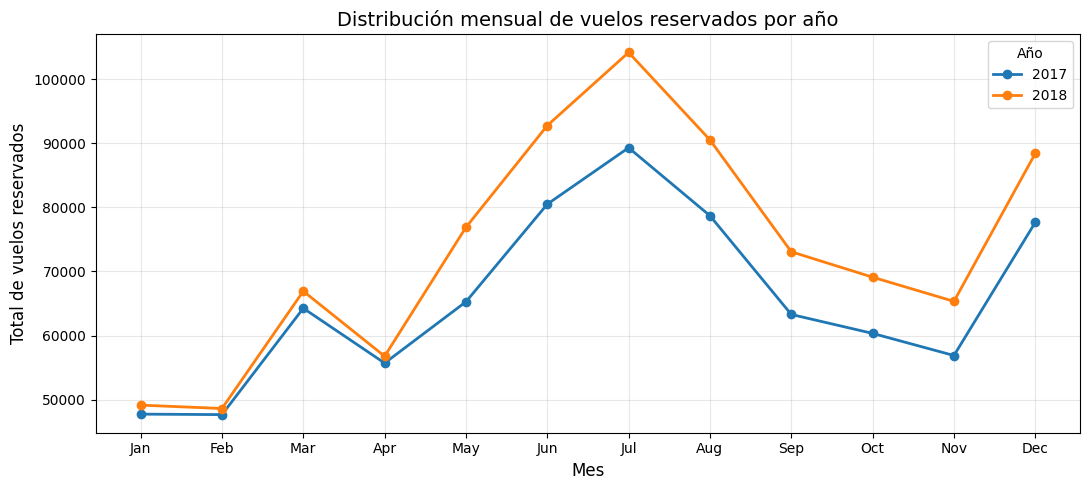

In [ ]:
# Se agrupan los datos por flight_year y flight_month para obtener el volumen total mensual de cada año.

flights_by_month_year = (df_final.groupby(["year", "month"], as_index=False)["flights_booked"].sum().sort_values(["year", "month"]))

# Mapeo de número de mes a nombre de mes

month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug",9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

flights_by_month_year["month_name"] = (flights_by_month_year["month"].map(month_map))

# Visualización: gráfico de líneas comparativo por año

plt.figure(figsize=(11, 5))

# iterar sobre cada año
for year in flights_by_month_year["year"].unique(): 
    subset = flights_by_month_year[flights_by_month_year["year"] == year]

    plt.plot(subset["month_name"],subset["flights_booked"], marker="o", linewidth=2, label=str(year))


# configuración visual
plt.title("Distribución mensual de vuelos reservados por año", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Total de vuelos reservados", fontsize=12)

plt.grid(alpha=0.3)
plt.legend(title="Año")

plt.tight_layout()
plt.show()

Al analizar la evolución mensual del total de vuelos reservados en 2017 y 2018 se observa un patrón estacional muy similar en ambos años.

En los dos casos, la actividad aumenta progresivamente desde marzo hasta alcanzar su punto máximo en julio, lo que sugiere una fuerte influencia de la temporada alta de verano. Posteriormente, se aprecia un descenso gradual desde agosto hasta noviembre, con una ligera recuperación en diciembre.

Además, 2018 presenta valores superiores a 2017 en prácticamente todos los meses, lo que podría indicar un crecimiento general en la actividad del programa de fidelización o un aumento en la base de clientes.

En conjunto, se observa un comportamiento estacional claro y consistente entre ambos años, con picos en verano y menor actividad en los meses iniciales y finales del año.

La diferencia entre ambos años es especialmente notable en los meses centrales (mayo–julio), donde 2018 muestra un incremento más pronunciado.

Se ha utilizado un gráfico de líneas para representar la distribución mensual de vuelos reservados, ya que este tipo de visualización es especialmente adecuado para analizar la evolución temporal de una variable.

El uso de dos líneas diferenciadas permite comparar fácilmente el comportamiento entre los años 2017 y 2018, identificando tanto patrones estacionales como posibles diferencias en la tendencia general.

El gráfico facilita la detección de picos (como el observado en julio) y periodos de menor actividad, así como la comparación directa entre ambos años en cada mes. Por ello, el gráfico de líneas resulta la opción más apropiada para analizar variaciones a lo largo del tiempo y contrastar distintos periodos.


### ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

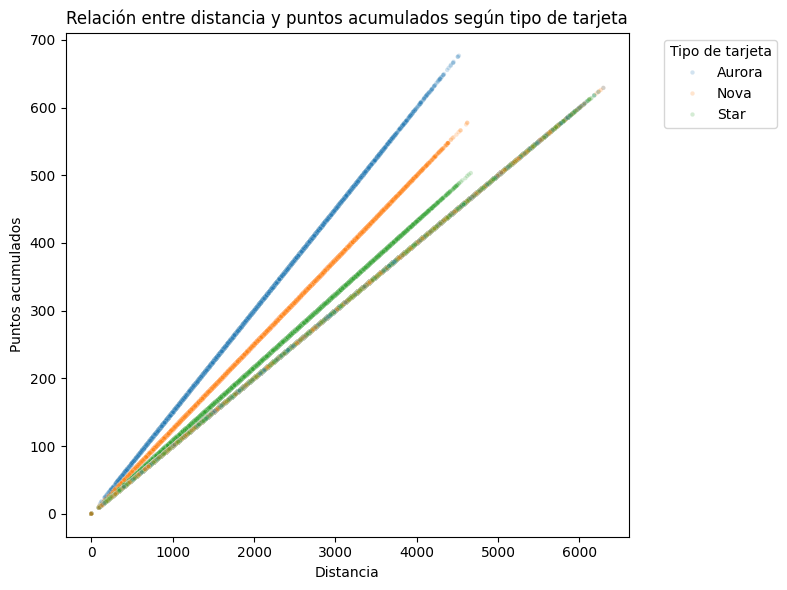

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_final,
    x="distance",
    y="points_accumulated",
    hue="loyalty_card",
    alpha=0.2,
    s=10
)

plt.title("Relación entre distancia y puntos acumulados según tipo de tarjeta")
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.legend(title="Tipo de tarjeta", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Se observa una relación lineal positiva prácticamente perfecta entre la distancia recorrida y los puntos acumulados. A medida que aumenta la distancia del vuelo, los puntos obtenidos crecen de forma proporcional, lo que confirma que el sistema de fidelización asigna puntos en función directa de la distancia.

La presencia de varias líneas paralelas sugiere la existencia de distintos niveles o condiciones de acumulación dentro del programa.

Se ha empleado un gráfico de dispersión debido a que se analiza la relación entre dos variables numéricas continuas. Este tipo de gráfico permite visualizar la existencia de una posible relación lineal entre la distancia recorrida y los puntos acumulados. La inclusión de una línea de tendencia facilita la interpretación de la dirección y fuerza de dicha relación.

### ¿Cuál es la distribución de los clientes por provincia o estado?

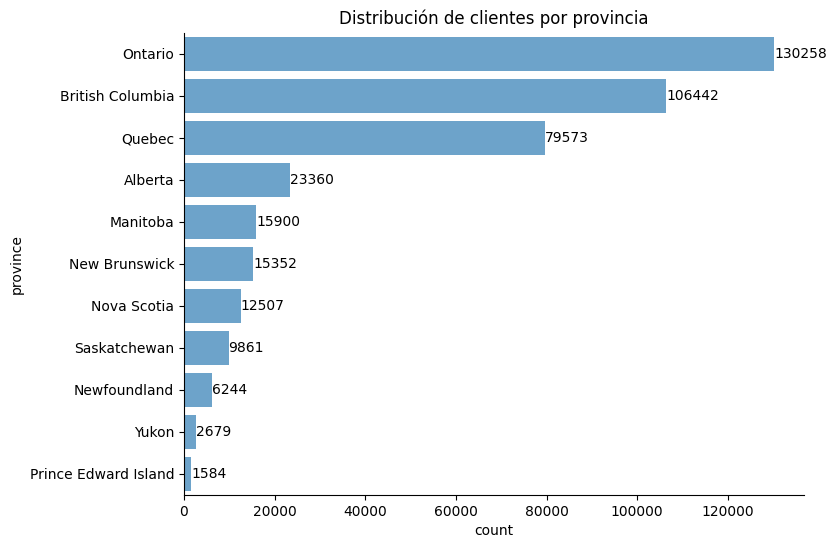

In [ ]:
provincia_counts = df_final["province"].value_counts().reset_index()
provincia_counts.columns = ["province", "count"]

plt.figure(figsize=(8,6))

ax = sns.barplot(data=provincia_counts, y="province", x="count", color="#5DA5DA")

for i in range(len(provincia_counts)):
    ax.text(
        provincia_counts["count"][i],
        i,
        provincia_counts["count"][i],
        va="center"
    )

plt.title("Distribución de clientes por provincia")
sns.despine()
plt.show()

La distribución de clientes por provincia muestra una mayor concentración en Ontario, British Columbia y Quebec. Este patrón probablemente está influenciado por factores demográficos y económicos, como la mayor población y actividad aérea en estas regiones. Provincias con menor población, como Yukon o Prince Edward Island, presentan una representación significativamente inferior, lo cual es coherente con su tamaño y volumen de mercado.

Se ha seleccionado un gráfico de barras horizontal porque se trata de una variable categórica con múltiples categorías. La orientación horizontal mejora la legibilidad de los nombres de las provincias y facilita la comparación de frecuencias entre ellas.

### ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

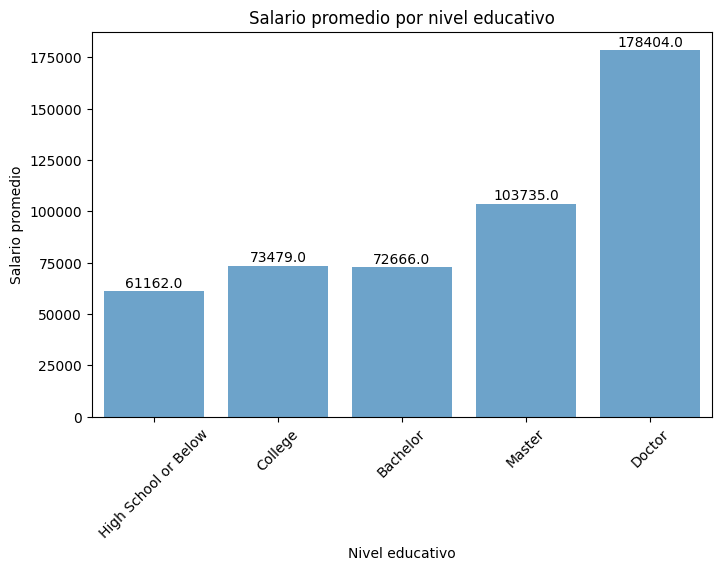

In [ ]:
orden = ["High School or Below", "College", "Bachelor", "Master", "Doctor"]

salario_edu = (df_final.groupby("education")["salary"].mean().reindex(orden).reset_index())

plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=salario_edu,
    x="education",
    y="salary",
    order=orden,
    color="#5DA5DA"
)

# Añadir valores de la media encima de cada barra
for i in range(len(salario_edu)):
    ax.text(
        i,
        salario_edu["salary"][i] + 2000,
        round(salario_edu["salary"][i], 0),
        ha="center"
    )

plt.xticks(rotation=45)
plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")

plt.show()

La distribución del salario muestra una tendencia claramente creciente conforme aumenta el nivel educativo. Los clientes con estudios de Doctor presentan los salarios más elevados y mayor dispersión, mientras que aquellos con High School or Below concentran los niveles más bajos.

Esta relación confirma una asociación positiva entre nivel educativo e ingresos, coherente con patrones socioeconómicos habituales.

Se ha utilizado un gráfico de barras porque el objetivo del ejercicio es comparar el salario promedio entre distintos niveles educativos. Este tipo de visualización permite observar de forma clara y directa las diferencias entre grupos categóricos.

El orden ascendente de los niveles educativos facilita la interpretación de la progresión salarial y permite identificar fácilmente la tendencia general.

### ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

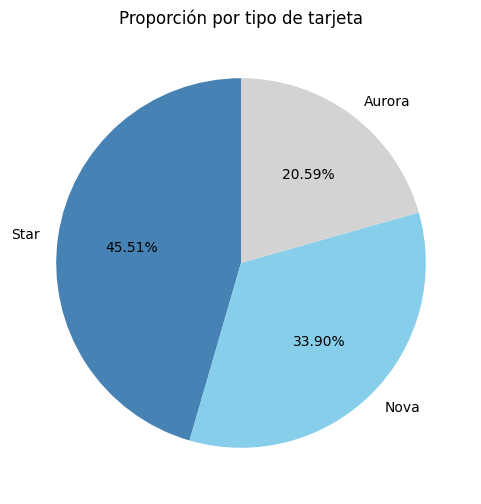

In [58]:
plt.figure(figsize=(6,6))

df_final["loyalty_card"].value_counts().plot.pie(autopct="%1.2f%%", startangle=90, colors=["steelblue", "skyblue", "lightgray"])

plt.title("Proporción por tipo de tarjeta")
plt.ylabel("")
plt.show()

El gráfico circular muestra que la tarjeta Star es la más representativa dentro del programa de fidelización, concentrando aproximadamente el 45,5% del total de clientes. Le sigue Nova con un 33,9%, mientras que Aurora representa el 20,6%.

Esta distribución indica que la mayoría de los clientes se concentra en los niveles iniciales o intermedios del programa, mientras que una menor proporción accede a niveles superiores.

Se ha optado por un gráfico circular (pie chart) debido a que la variable representa proporciones de un total y cuenta únicamente con tres categorías claramente diferenciadas. Este tipo de representación permite visualizar de forma intuitiva la participación relativa de cada tipo de tarjeta dentro del 100% de clientes, facilitando la comprensión global de la distribución.

### ¿Cómo se distribuyen los clientes según su estado civil y género?

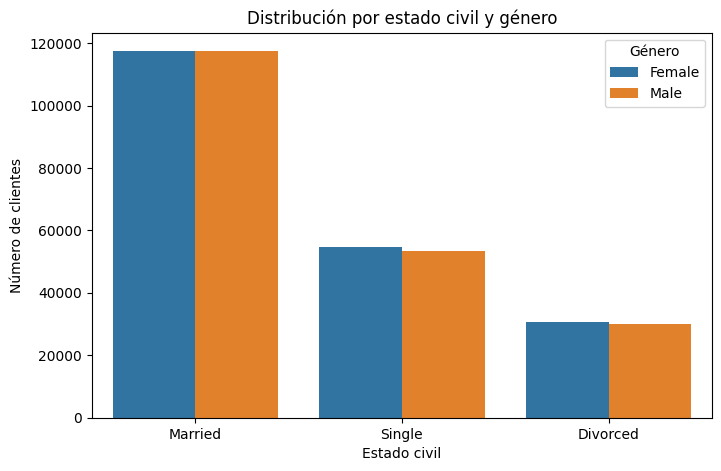

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(data=df_final, x="marital_status", hue="gender")

plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.title("Distribución por estado civil y género")

plt.legend(title="Género")

plt.show()

La distribución porcentual por estado civil muestra una proporción muy equilibrada entre hombres y mujeres en todas las categorías. No se observan diferencias significativas en la representación de género dentro de cada estado civil, lo que indica una base de clientes homogénea desde el punto de vista demográfico.

Se ha utilizado un gráfico de barras apiladas al 100% para comparar la distribución porcentual de hombres y mujeres dentro de cada estado civil. Este tipo de representación permite analizar diferencias relativas entre géneros independientemente del tamaño total de cada categoría, facilitando la comparación proporcional entre grupos.

## Conclusiones

La fase de visualización confirma los patrones identificados en el análisis estadístico previo. Se observa estacionalidad en la actividad de vuelos, una relación lineal directa entre distancia y puntos acumulados, concentración geográfica en determinadas provincias y una relación positiva entre nivel educativo y salario. Asimismo, la distribución por tipo de tarjeta muestra una mayor presencia en los niveles iniciales del programa, y no se detectan diferencias relevantes de género en función del estado civil. En conjunto, las representaciones gráficas refuerzan la coherencia interna del dataset y permiten comunicar los resultados de forma clara e intuitiva.

## Fase 4: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberás seguir son:

- Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

- Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

In [ ]:
df_edu = df_final[["flights_booked", "education"]]

In [ ]:
resumen_edu = df_edu.groupby("education")["flights_booked"].describe().round(2)
resumen_edu

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.11,5.22,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.17,5.25,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.18,5.26,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.18,5.24,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.20,5.21,0.0,0.0,1.0,8.0,21.0


El análisis descriptivo muestra que el promedio de vuelos reservados es muy similar entre los distintos niveles educativos. Las medias oscilan ligeramente entre 4.11 y 4.20 vuelos, sin que se observe una diferencia relevante entre grupos.

La mediana es 1 en todos los niveles educativos, lo que indica que al menos la mitad de los clientes reserva uno o ningún vuelo, independientemente de su formación. Además, la desviación estándar es prácticamente idéntica en todos los grupos (alrededor de 5.2), lo que refleja una variabilidad similar en el comportamiento de los clientes.

En conjunto, no se aprecia una relación significativa entre el nivel educativo y la cantidad de vuelos reservados. El comportamiento en términos de reservas parece depender más de factores individuales que del nivel de estudios.

# Conclusiones finales del proyecto

El análisis del conjunto de datos permite comprender en profundidad el comportamiento de los clientes dentro del programa de fidelización.

En primer lugar, se observa una fuerte concentración de valores bajos en las variables relacionadas con la actividad de vuelo y la redención de puntos. La mayoría de los clientes reserva pocos vuelos y no redime puntos, mientras que una minoría presenta niveles de actividad elevados que incrementan las medias. Esto refleja un comportamiento heterogéneo dentro del programa.

En cuanto a la evolución temporal, se identifica un patrón estacional claro en ambos años analizados, con un aumento progresivo de reservas hasta el verano (pico en julio) y un descenso posterior en los meses finales del año. Además, 2018 muestra niveles de actividad superiores a 2017, lo que podría indicar crecimiento del programa.

Respecto a las variables sociodemográficas, no se aprecian diferencias relevantes en el número de vuelos reservados según el nivel educativo. Sin embargo, sí se observa una relación clara entre el nivel educativo y el salario promedio, que aumenta progresivamente con el nivel de estudios.

Finalmente, el análisis confirma que el comportamiento dentro del programa de fidelización depende principalmente de patrones individuales de actividad y no tanto de características demográficas como el nivel educativo.

En conjunto, el dataset presenta coherencia interna y patrones consistentes con un programa de fidelización basado en la actividad de vuelo.
